In [1]:
# Specify your working directory goes here
working_dir <- "C:/BUAS repos/2023-24a-fai2-adsai-MichalDziechciarz225484/EDA"
setwd(working_dir) # Setting working directory


In [2]:
## --Load Libraries-------------------------------------------------------------##
require("dplyr")
require("readr")
require("data.table")
require("ggplot2")


Loading required package: dplyr


Attaching package: 'dplyr'


The following objects are masked from 'package:stats':

    filter, lag


The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union


Loading required package: readr

Loading required package: data.table


Attaching package: 'data.table'


The following objects are masked from 'package:dplyr':

    between, first, last


Loading required package: ggplot2



In [3]:
## --Load Files -------------------------------------------------------------##
data_dir <- paste0(working_dir, "/data/")

numeric_data <- read_csv(paste0(data_dir, "df_num_2023-10-27.csv"))
text_data <- read_csv(paste0(data_dir, "df_text_2023-10-27.csv"))


Rows: 588 Columns: 419
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (419): StartDate, EndDate, Status, Progress, Duration (in seconds), Fini...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 588 Columns: 419
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (419): StartDate, EndDate, Status, Progress, Duration (in seconds), Fini...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [4]:
cleaned_data_text <- text_data[complete.cases(text_data), ]

# Get all rows with demo_domain == "Leisure & Events"
leisure_events_text <- text_data[text_data$demo_domain == "Leisure & Events" & !is.na(text_data$demo_domain), ]
leisure_events_num <- numeric_data[numeric_data$demo_domain == 2 & !is.na(numeric_data$demo_domain), ]


In [5]:
# Read the values of the column and if all is NA, remove this entire column
na_columns <- which(colSums(is.na(leisure_events_text)) == nrow(leisure_events_text))

# Remove all columns with NA values
leisure_events_text <- leisure_events_text[, -na_columns]
leisure_events_num <- leisure_events_num[, -na_columns]


In [6]:
# Columns to exclude
leisure_events_text <- leisure_events_text %>% select(-Q3.7:-Q10.9)
leisure_events_text <- leisure_events_text %>% select(-G_awareness:-Q4.1)

leisure_events_num <- leisure_events_num %>% select(-Q3.7:-Q10.9)
leisure_events_num <- leisure_events_num %>% select(-G_awareness:-Q4.1)


In [7]:
names(leisure_events_num)


[1] "StartDate"              "EndDate"                "Status"                
 [4] "Progress"               "Duration (in seconds)"  "Finished"              
 [7] "RecordedDate"           "ResponseId"             "DistributionChannel"   
[10] "UserLanguage"           "Q2.2"                   "demo_role"             
[13] "demo_gender"            "demo_age"               "demo_domain"           
[16] "demo_year_study"        "demo_experience"        "demo_ai_know"          
[19] "ml_dl_famil"            "aware_dom"              "ai_courses"            
[22] "aware_everyday"         "used_ai"                "att_pos_1"             
[25] "att_pos_2"              "att_pos_3"              "att_pos_4"             
[28] "att_neg_1"              "att_neg_2"              "att_neg_3"             
[31] "acc_1"                  "acc_2"                  "acc_3"                 
[34] "acc_4"                  "acc_5"                  "acc_6"                 
[37] "LE_acceptance"          "LE_ethicalconcern...76" "LE_bias...77"          
[40] "LE_ethicalconcern...78" "LE_transparency"        "LE_bias...80"          
[43] "LE_efficacy"            "LE_fairness"            "msc_ai_t"

In [8]:
names(leisure_events_num)[names(leisure_events_num) == "ml_dl_famil"] <- "awa_1"
names(leisure_events_num)[names(leisure_events_num) == "aware_dom"] <- "awa_2"
names(leisure_events_num)[names(leisure_events_num) == "ai_courses"] <- "awa_3"
names(leisure_events_num)[names(leisure_events_num) == "aware_everyday"] <- "awa_4"
names(leisure_events_num)[names(leisure_events_num) == "used_ai"] <- "awa_5"


In [9]:
# Fix awa_5 values
leisure_events_num$acc_5[leisure_events_num$acc_5 == 15] <- 1
leisure_events_num$acc_5[leisure_events_num$acc_5 == 16] <- 2
leisure_events_num$acc_5[leisure_events_num$acc_5 == 17] <- 3
leisure_events_num$acc_5[leisure_events_num$acc_5 == 18] <- 4
leisure_events_num$acc_5[leisure_events_num$acc_5 == 19] <- 5


In [10]:
# Replace NAs with 3 (neither agree or disagree)
leisure_events_num <- replace(leisure_events_num, is.na(leisure_events_num), "3")


In [11]:
leisure_events_num <- leisure_events_num %>% mutate_all(as.numeric)


Warning message:
"There were 7 warnings in `mutate()`.
The first warning was:
ℹ In argument: `StartDate = .Primitive("as.double")(StartDate)`.
Caused by warning:
! NAs introduced by coercion
ℹ Run `dplyr::last_dplyr_warnings()` to see the 6 remaining warnings."


In [12]:
names(leisure_events_num)


[1] "StartDate"              "EndDate"                "Status"                
 [4] "Progress"               "Duration (in seconds)"  "Finished"              
 [7] "RecordedDate"           "ResponseId"             "DistributionChannel"   
[10] "UserLanguage"           "Q2.2"                   "demo_role"             
[13] "demo_gender"            "demo_age"               "demo_domain"           
[16] "demo_year_study"        "demo_experience"        "demo_ai_know"          
[19] "awa_1"                  "awa_2"                  "awa_3"                 
[22] "awa_4"                  "awa_5"                  "att_pos_1"             
[25] "att_pos_2"              "att_pos_3"              "att_pos_4"             
[28] "att_neg_1"              "att_neg_2"              "att_neg_3"             
[31] "acc_1"                  "acc_2"                  "acc_3"                 
[34] "acc_4"                  "acc_5"                  "acc_6"                 
[37] "LE_acceptance"          "LE_ethicalconcern...76" "LE_bias...77"          
[40] "LE_ethicalconcern...78" "LE_transparency"        "LE_bias...80"          
[43] "LE_efficacy"            "LE_fairness"            "msc_ai_t"

In [13]:
# Extract relevant columns
metrics <- leisure_events_num[, c("demo_role", "awa_1", "awa_2", "awa_3", "awa_4", "awa_5", "acc_1", "acc_2", "acc_3", "acc_4", "acc_5", "acc_6", "att_pos_1", "att_pos_2", "att_pos_3", "att_pos_4", "att_neg_1", "att_neg_2", "att_neg_3")]


In [14]:
metrics$acc_avg <- rowMeans(metrics[, grepl("^acc_", names(metrics))], na.rm = TRUE)
metrics$awa_avg <- rowMeans(metrics[, grepl("^awa_", names(metrics))], na.rm = TRUE)
metrics$att_pos_avg <- rowMeans(metrics[, grepl("^att_pos_", names(metrics))], na.rm = TRUE)
metrics$att_neg_avg <- rowMeans(metrics[, grepl("^att_neg_", names(metrics))], na.rm = TRUE)


In [15]:
# Filter data for students
students <- subset(metrics, demo_role == "1")

# Filter data for staff
staff <- subset(metrics, demo_role != "1")


In [16]:
ttest_acc <- t.test(students$acc_avg, staff$acc_avg)
ttest_awa <- t.test(students$awa_avg, staff$awa_avg)
ttest_att_pos <- t.test(students$att_pos_avg, staff$att_pos_avg)
ttest_att_neg <- t.test(students$att_neg_avg, staff$att_neg_avg)


In [17]:
ttest_acc



	Welch Two Sample t-test

data:  students$acc_avg and staff$acc_avg
t = 0.4101, df = 2.2437, p-value = 0.7176
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -1.106065  1.367176
sample estimates:
mean of x mean of y 
 3.186111  3.055556 


In [18]:
ttest_awa



	Welch Two Sample t-test

data:  students$awa_avg and staff$awa_avg
t = -3.1629, df = 2.3467, p-value = 0.0707
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -2.0901002  0.1767669
sample estimates:
mean of x mean of y 
 2.910000  3.866667 


In [19]:
ttest_att_pos



	Welch Two Sample t-test

data:  students$att_pos_avg and staff$att_pos_avg
t = -0.10628, df = 2.2218, p-value = 0.9242
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -1.577067  1.493734
sample estimates:
mean of x mean of y 
 3.458333  3.500000 


In [20]:
ttest_att_neg



	Welch Two Sample t-test

data:  students$att_neg_avg and staff$att_neg_avg
t = 3.4912, df = 2.1381, p-value = 0.06642
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -0.251202  3.406758
sample estimates:
mean of x mean of y 
 3.022222  1.444444 


In [21]:
names(metrics)


[1] "demo_role"   "awa_1"       "awa_2"       "awa_3"       "awa_4"      
 [6] "awa_5"       "acc_1"       "acc_2"       "acc_3"       "acc_4"      
[11] "acc_5"       "acc_6"       "att_pos_1"   "att_pos_2"   "att_pos_3"  
[16] "att_pos_4"   "att_neg_1"   "att_neg_2"   "att_neg_3"   "acc_avg"    
[21] "awa_avg"     "att_pos_avg" "att_neg_avg"

## Linear regression


In [22]:
lr_metrics <- metrics %>% select("acc_avg", "awa_avg", "att_pos_avg", "att_neg_avg")


In [23]:
model <- lm(att_pos_avg ~ ., data = lr_metrics)
summary(model)



Call:
lm(formula = att_pos_avg ~ ., data = lr_metrics)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.40358 -0.33410 -0.09346  0.39235  1.26284 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   2.4314     0.5270   4.613 2.18e-05 ***
acc_avg       0.6156     0.1515   4.063 0.000145 ***
awa_avg      -0.1403     0.1255  -1.118 0.267897    
att_neg_avg  -0.1744     0.1132  -1.541 0.128697    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.6158 on 59 degrees of freedom
Multiple R-squared:  0.2224,	Adjusted R-squared:  0.1829 
F-statistic: 5.626 on 3 and 59 DF,  p-value: 0.001845


_ChatGPT interpretation_:

Based on the summary output of the linear regression model, it provides insights into the potential
observed predictors (independent variables) for the outcome variable (`att_pos_avg`) of your
research questions.

The coefficients of the model represent the estimated effects of each predictor variable on the
outcome variable. In this case, the significant predictors are `acc_avg`, which has a positive
coefficient, and the intercept (constant term). This suggests that as the level of acceptance
(`acc_avg`) increases, the average expected value of positive attitude (`att_pos_avg`) also tends to
increase.

However, the other predictor variables (`awa_avg` and `att_neg_avg`) in the model are not found to
be statistically significant based on their p-values. This indicates that there is insufficient
evidence to conclude that `awa_avg` and `att_neg_avg` have a significant effect on `att_pos_avg`
when considering the other variables in the model.

Keep in mind that these results are specific to the dataset and variables used in the model. It's
important to interpret the findings within the context of your research question and dataset. It's
also worth considering exploring other potential predictors or refining the model based on domain
knowledge or relevant literature. Further analysis and additional data may help uncover more
accurate potential predictors for your outcome variable.


`geom_smooth()` using formula = 'y ~ x'


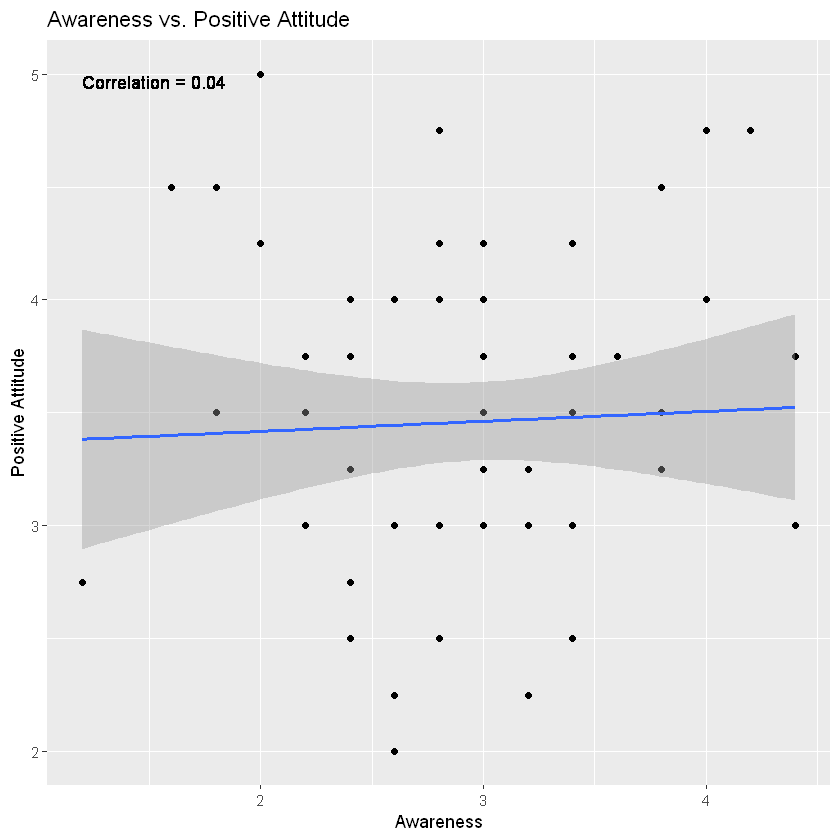

In [37]:
# Scatter plot for awareness vs. positive attitude
cor_awareness <- cor(lr_metrics$awa_avg, lr_metrics$att_pos_avg)

ggplot(lr_metrics, aes(x = awa_avg, y = att_pos_avg)) +
  geom_point() +
  geom_smooth(method = "lm") +
  labs(x = "Awareness", y = "Positive Attitude") +
  ggtitle("Awareness vs. Positive Attitude") +
  geom_text(
    x = min(lr_metrics$awa_avg), y = max(lr_metrics$att_pos_avg),
    label = paste("Correlation =", round(cor_awareness, 2)), hjust = 0, vjust = 1
  )


`geom_smooth()` using formula = 'y ~ x'


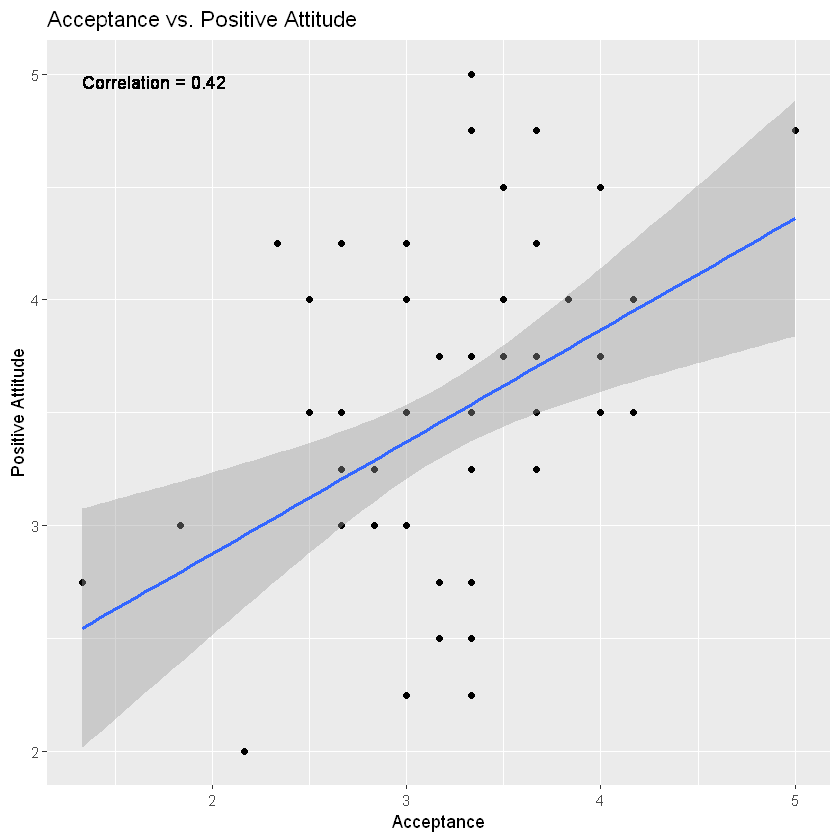

In [36]:
# Scatter plot for acceptance vs. positive attitude
cor_acceptance <- cor(lr_metrics$acc_avg, lr_metrics$att_pos_avg)

ggplot(lr_metrics, aes(x = acc_avg, y = att_pos_avg)) +
  geom_point() +
  geom_smooth(method = "lm") +
  labs(x = "Acceptance", y = "Positive Attitude") +
  ggtitle("Acceptance vs. Positive Attitude") +
  geom_text(
    x = min(lr_metrics$acc_avg), y = max(lr_metrics$att_pos_avg),
    label = paste("Correlation =", round(cor_acceptance, 2)), hjust = 0, vjust = 1
  )


`geom_smooth()` using formula = 'y ~ x'


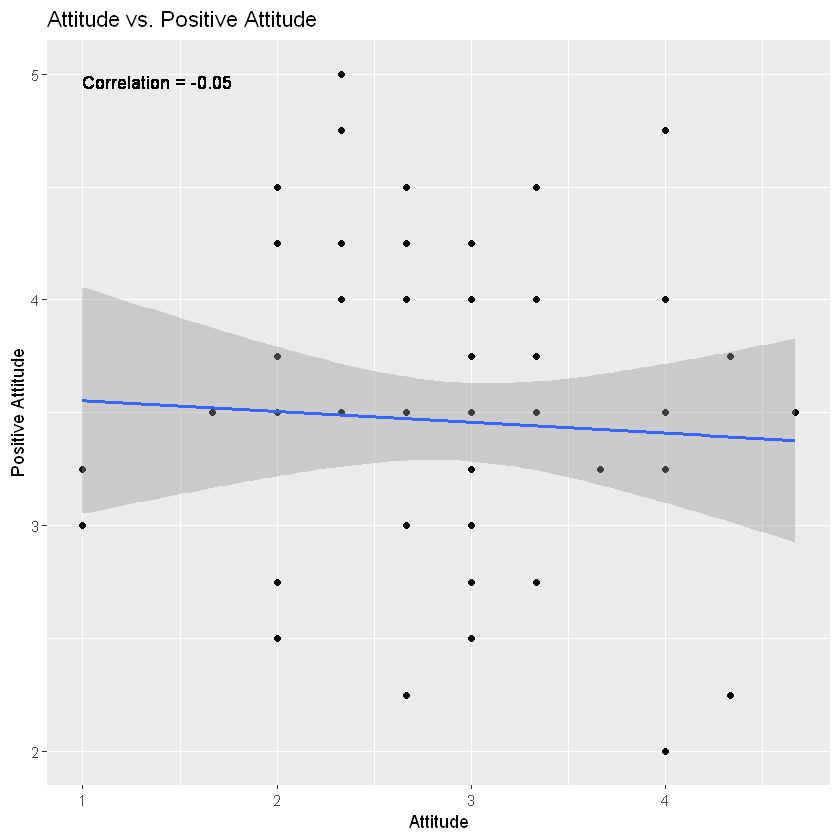

In [38]:
# Scatter plot for attitude vs. positive attitude
cor_attitude <- cor(lr_metrics$att_neg_avg, lr_metrics$att_pos_avg)

ggplot(lr_metrics, aes(x = att_neg_avg, y = att_pos_avg)) +
  geom_point() +
  geom_smooth(method = "lm") +
  labs(x = "Negative Attitude", y = "Positive Attitude") +
  ggtitle("Negative Attitude vs. Positive Attitude") +
  geom_text(
    x = min(lr_metrics$att_neg_avg), y = max(lr_metrics$att_pos_avg),
    label = paste("Correlation =", round(cor_attitude, 2)), hjust = 0, vjust = 1
  )
